In [2]:
from matplotlib import pyplot as plt
import matplotlib
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker

import numpy as np
import pandas as pd

In [3]:
#Read in the data

#This one is formatted nicely for scatter plots
df=pd.read_csv('Examples/australia/AUSP1306/Paleotopo/Paleotopo_P100_50km_.csv',sep=",",names=["Longitude","Latitude","Eastings","Northings","Elevation"])

#This one is formatted nicely for pcolomesh/heatmap plots 
#(although you will need to make the labels or just grab them from the oterh dataset... as below)
df2=pd.read_csv('Examples/australia/data/initial_elev.txt', sep=' ',header=None)

#This one is formatted nicely for pcolomesh/heatmap plots 
#(although you will need to make the labels or just grab them from the oterh dataset... as below)
df3=pd.read_csv('Examples/australia/data/final_elev.txt', sep=' ',header=None)


In [4]:
#Set up the labels for the pcolormesh plot
print(np.shape(df2))

lons=np.linspace(df.Longitude.min(),df.Longitude.max(),np.shape(df2)[1])
print(len(lons))

lats=np.linspace(df.Latitude.min(),df.Latitude.max(),np.shape(df2)[0])
print(len(lats))

(129, 141)
141
129


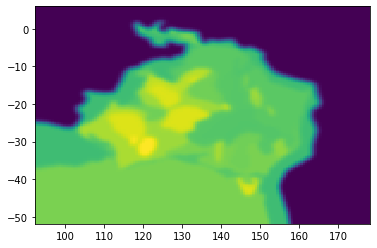

In [5]:
#Make a plot with pcolormesh
plt.pcolormesh(lons,lats,df2.values)


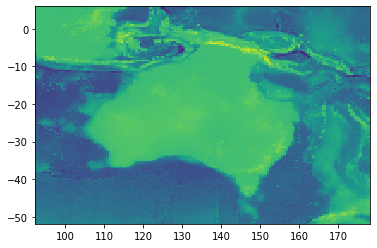

In [6]:
plt.pcolormesh(lons,lats,df3.values)


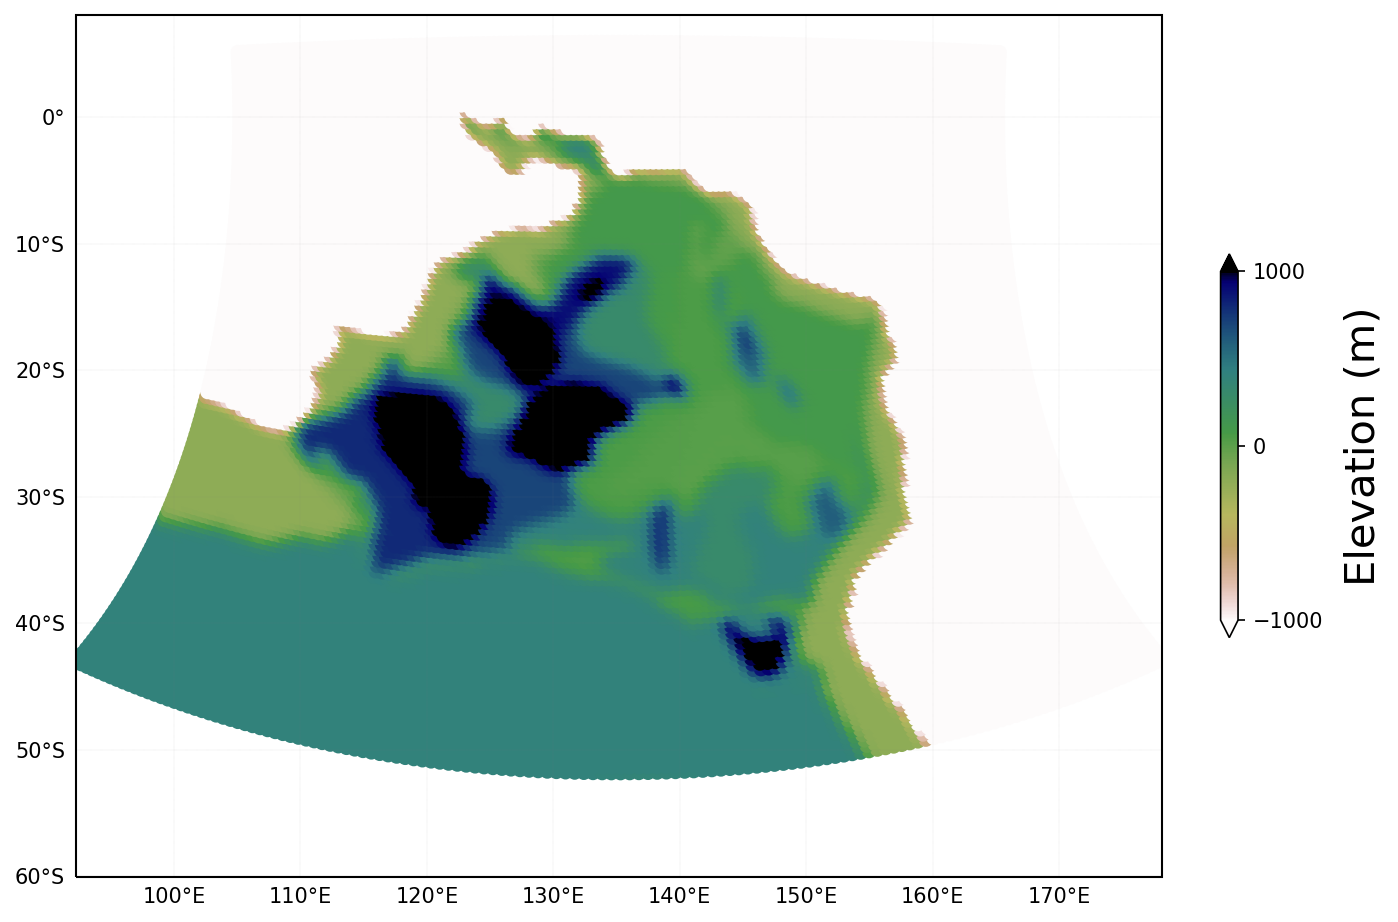

In [7]:
#Set up the figure
fig = plt.figure(figsize=(10,10),dpi=150)
ax = plt.axes(projection=ccrs.PlateCarree())
#ax.set_global()


#Full control over the gridline formatting
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=0.1, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlines = True
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
#gl.xlabel_style = {'size': 15, 'color': 'gray'}
#gl.xlabel_style = {'color': 'red', 'weight': 'bold'}


#Plot of the actual data
mapscat=plt.scatter(df.Longitude,df.Latitude,c=df.Elevation,
                    cmap=plt.cm.gist_earth_r,transform=ccrs.PlateCarree(),vmin=-1000,vmax=1000)

#mapscat=plt.pcolormesh(lons,lats,df2.values,
#                      cmap=plt.cm.gist_earth_r,transform=ccrs.PlateCarree(),vmin=-1000,vmax=1000)


#lon/lat extent of image - crop as needed
ax.set_extent([df.Longitude.min(), df.Longitude.max(), df.Latitude.min(), df.Latitude.max()])


#Add x/y titles
ax.set_ylabel('Latitude')
ax.set_ylabel('Longitude')


#Add colorbar
cbar=plt.colorbar(mapscat, ax=ax, orientation="vertical", 
                  pad=0.05, fraction=0.015, shrink=0.5,extend='both',ticks=[-1000, 0, 1000])
cbar.set_label('Elevation (m)',labelpad=10,size=20)




plt.show()